# Hypothesis I: Income Vs House Price


Dataset taken from Kaggle :https://www.kaggle.com/datasets/samuelcortinhas/uk-median-house-prices-and-salary-19752020

In [1]:
#importing various libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#importing the dataset
df = pd.read_csv(r"C:/Users/hp/dissertation/Datasets/income_HP_kaggle.csv")

In [3]:
#checking the shape of the dataset
df.shape

(46, 3)

In [26]:
#the first 5 rows of the dataframe
df.head()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
0,1975,94983,NaN
1,1976,89281,NaN
2,1977,85028,NaN
3,1978,100519,NaN
4,1979,112067,NaN


In [4]:
#checking the statistics of the dataset
df.describe()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
count,46.000000,46.000000,22.000000
mean,1997.500000,164014.717391,32791.958182
std,13.422618,60004.318931,1548.767865
min,1975.000000,85028.000000,30772.440000
25%,1986.250000,110149.250000,31436.870000
50%,1997.500000,141578.500000,32484.225000
75%,2008.750000,225347.750000,34145.020000
max,2020.000000,269297.000000,35399.830000


<AxesSubplot:xlabel='Median Salary adj. by inflation (pounds)'>

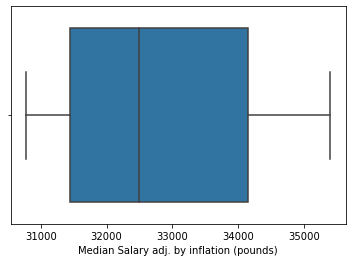

In [5]:
#visualizing the salary
sns.boxplot(x='Median Salary adj. by inflation (pounds)',data=df)

We can see the median salary is around 32,500 pounds.

<AxesSubplot:xlabel='Average house price adj. by inflation (pounds)'>

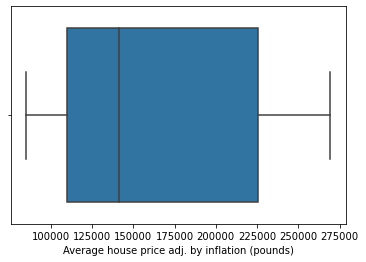

In [6]:
#visualizing the house prices
sns.boxplot(x='Average house price adj. by inflation (pounds)',data=df)

We can see that  the median house price is around 142000 pounds.

Text(0, 0.5, 'Average price adjusted by inflation (£)')

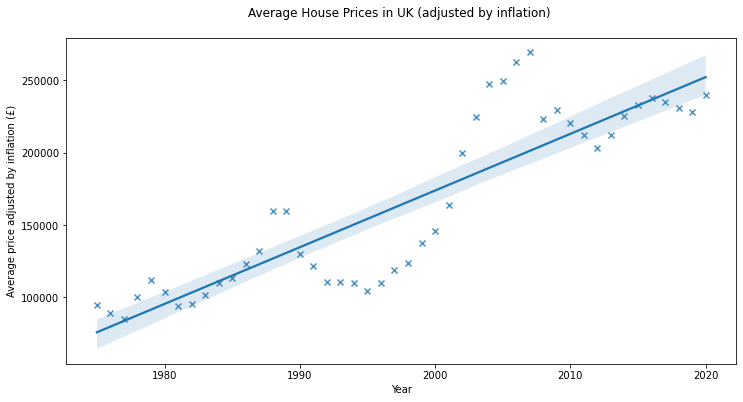

In [7]:
# Plotting average house price over the years
plt.figure(figsize=(12,6))
sns.regplot(x='Year', y='Average house price adj. by inflation (pounds)', data=df,marker='x')
plt.title('Average House Prices in UK (adjusted by inflation) \n')
plt.xlabel('Year')
plt.ylabel('Average price adjusted by inflation (£)')

In [8]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'],
                                                               df['Average house price adj. by inflation (pounds)'])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ 3920.94


Observations:

The regression line tells us that houses prices are increasing each year on average after inflation has been taken into account. By nearly £3900 a year! <br/>
We also see that houses prices took a serious drop in 2008/2009 due to the housing market crash at that time. <br/>


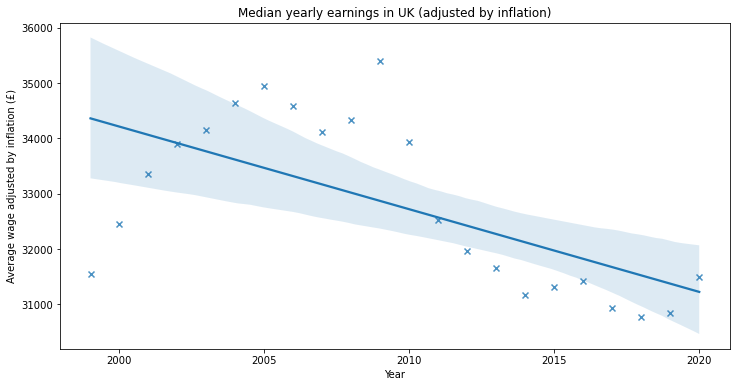

In [9]:
# Plotting the average salary over time
plt.figure(figsize=(12,6))
sns.regplot(x='Year', y='Median Salary adj. by inflation (pounds)', data=df,marker='x')
plt.title('Median yearly earnings in UK (adjusted by inflation)')
plt.xlabel('Year')
plt.ylabel('Average wage adjusted by inflation (£)')
plt.show()

In [10]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df.iloc[24:,0],df.iloc[24:,2])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ -149.39


Observations:

The average salary in the UK is actually decreasing (by £150) each year on average after inflation has been taken into account.<br/>
It seems they took the biggest hit just after the housing market crash of 2008-2009.<br/>
Whilst house prices bounced back after 2010, wages have not.

In [11]:
df.corr()

,Year,Average house price adj. by inflation (pounds),Median Salary adj. by inflation (pounds)
Year,1.000000,0.877091,-0.626351
Average house price adj. by inflation (pounds),0.877091,1.000000,0.227437
Median Salary adj. by inflation (pounds),-0.626351,0.227437,1.000000


Conclusion:

Have house prices increased overtime? Yes! Average house price adj. by inflation have gone up by: £3920.94<br/>
Have salaries increased? No Median Salary adj. by inflation have gone down by: £-149.39<br/>
Is there a correlation between house prices and salaries? Yes a negative correlation as the house prices are increasing while the income is decreasing<br/>

### Another Dataset from GOV.UK

Data source : https://www.gov.uk/government/collections/uk-house-price-index-reports 

In [12]:
#importing the dataset 
df1 = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/income_HP_govuk.xlsx')
df1

,year,quarter,average_price_new_dwelling,average_advance_new_dwelling,Average_income_new_dwelling,average_price_other_dwellings,average_advance_other_dwellings,average_income_other_dwellings,average_price_all_dwellings,average_advance_all_dwellings,average_income_all_dwellings,average_price_first_time,average_advance_first_time,average_income_first_time,average_price_former_owner,average_advance_former_owner,average_income_former_owner
0,1992,Q2,77360.000000,51950,24149,60210.000000,43181,20655,62255.000000,44123,21042,46919.000000,39159,18001,76988.000000,48643,24059
1,1992,Q3,69893.000000,49558,24049,62513.000000,44632,21434,63712.000000,45262,21772,48578.000000,40244,18630,79493.000000,50201,24978
2,1992,Q4,70043.000000,50374,23462,57193.000000,41173,20377,59230.000000,42452,20851,44831.000000,36958,17656,76992.000000,48979,24803
3,1993,Q1,72700.000000,51911,24440,58345.000000,42265,20668,60213.000000,43413,21131,46300.000000,38007,18032,77787.000000,49890,25076
4,1993,Q2,73289.000000,51219,23291,60196.000000,43964,21008,61895.000000,44751,21292,48566.000000,39836,18299,78151.000000,50540,24987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2020,Q4,325559.000000,213427,65829,325609.333333,220337,67319,325534.666667,219099,67051,244720.333333,182238,52819,393102.000000,249924,79026
115,2021,Q1,335948.333333,215643,66991,346924.666667,229531,69619,345338.000000,227561,69246,256983.000000,189152,54789,408762.333333,255144,79689
116,2021,Q2,328260.000000,212524,66251,345131.333333,230013,69547,342759.333333,227481,69072,255856.666667,189999,54949,415792.000000,259116,81044
117,2021,Q3,298342.333333,197523,61645,294768.333333,202936,61362,295338.333333,202204,61408,223715.000000,172106,49808,368128.666667,232854,73378


In [27]:
#checking the shape of dataset
df1.shape

(119, 17)

In [13]:
#checking the statistics of the dataset
df1.describe()

,year,average_price_new_dwelling,average_advance_new_dwelling,Average_income_new_dwelling,average_price_other_dwellings,average_advance_other_dwellings,average_income_other_dwellings,average_price_all_dwellings,average_advance_all_dwellings,average_income_all_dwellings,average_price_first_time,average_advance_first_time,average_income_first_time,average_price_former_owner,average_advance_former_owner,average_income_former_owner
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,2006.621849,196444.111731,128968.865546,47887.764706,186690.782069,124176.764706,44975.008403,188025.904870,124669.033613,45342.672269,139986.913307,107334.067227,36349.991597,222480.240691,137844.386555,51766.815126
std,8.624946,82279.878773,51671.723409,13887.346746,88209.771830,57446.228632,15563.355900,87461.567154,56807.216009,15358.703070,65845.709275,47804.179466,11740.007868,104455.798468,64285.701224,18039.322832
min,1992.000000,69893.000000,49558.000000,23291.000000,57193.000000,41173.000000,20377.000000,59230.000000,42452.000000,20851.000000,44831.000000,36958.000000,17656.000000,76988.000000,48643.000000,24059.000000
25%,1999.000000,114365.000000,79796.000000,35735.500000,94230.500000,65947.000000,29516.000000,96715.500000,67451.000000,30222.500000,73960.000000,59013.000000,25599.000000,116156.000000,74555.500000,34387.000000
50%,2007.000000,212554.000000,133585.000000,51121.000000,217128.000000,136743.000000,52856.000000,215730.762858,136312.000000,52518.000000,154207.000000,118253.000000,40219.000000,249176.000000,147970.000000,59270.000000
75%,2014.000000,267693.666667,175222.000000,61512.500000,264488.368511,175196.000000,58184.500000,265201.172525,175458.000000,58788.000000,201089.604922,152309.500000,47295.000000,309939.766568,191378.000000,67983.500000
max,2021.000000,335948.333333,215643.000000,68068.000000,346924.666667,230013.000000,69619.000000,345338.000000,227561.000000,69246.000000,256983.000000,189999.000000,54949.000000,415792.000000,259116.000000,81044.000000


In [14]:
#checking the null values
df1.isna().sum()

year                               0
quarter                            0
average_price_new_dwelling         0
average_advance_new_dwelling       0
Average_income_new_dwelling        0
average_price_other_dwellings      0
average_advance_other_dwellings    0
average_income_other_dwellings     0
average_price_all_dwellings        0
average_advance_all_dwellings      0
average_income_all_dwellings       0
average_price_first_time           0
average_advance_first_time         0
average_income_first_time          0
average_price_former_owner         0
average_advance_former_owner       0
average_income_former_owner        0
dtype: int64

In [ ]:
# group by the quarters to check the average yearly values
df_group_year = df1.groupby('year').mean()

Text(0, 0.5, 'Price (in pounds)')

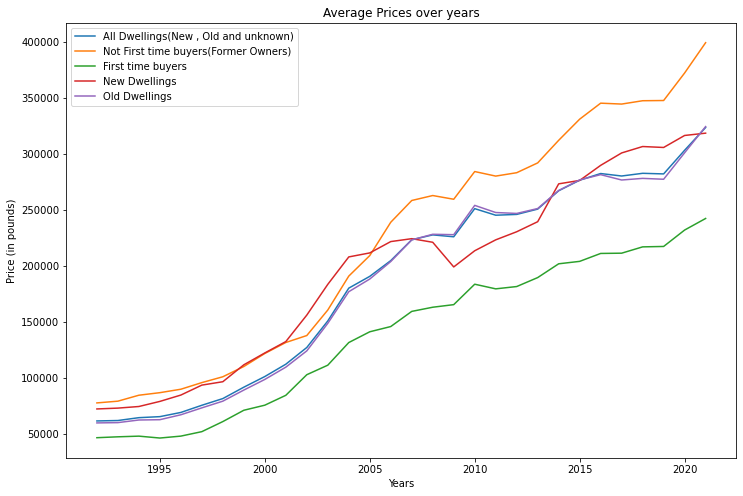

In [16]:
#plotting the average prices amoung dwellings over years
plt.figure(figsize=(12, 8)) 
plt.plot(df_group_year.average_price_all_dwellings, label='All Dwellings(New , Old and unknown)')
plt.plot(df_group_year.average_price_former_owner, label ="Not First time buyers(Former Owners)")
plt.plot(df_group_year.average_price_first_time, label ="First time buyers")
plt.plot(df_group_year.average_price_new_dwelling, label = 'New Dwellings')
plt.plot(df_group_year.average_price_other_dwellings, label ='Old Dwellings')
plt.title('Average Prices over years')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Price (in pounds)')

#### From the above chart we can see that the average house prices for former home buyers(not first time home buyers) is the highest from 1992 to present.

Text(0, 0.5, 'Price (in pounds)')

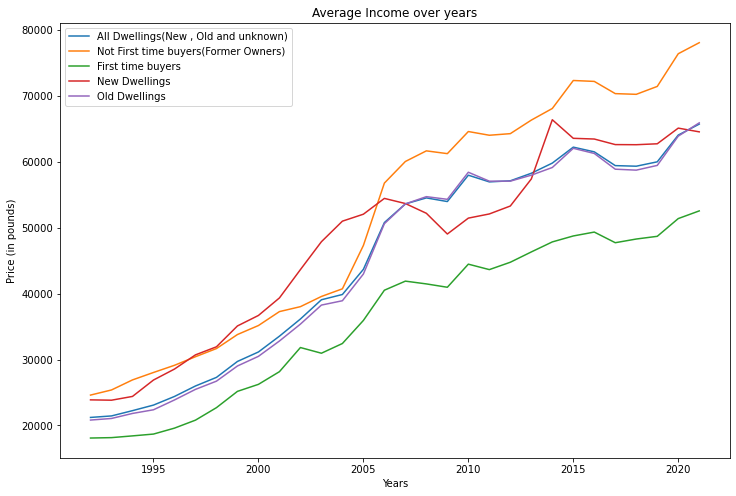

In [17]:
#plotting the average prices amoung dwellings over years
plt.figure(figsize=(12, 8)) 
plt.plot(df_group_year.average_income_all_dwellings, label='All Dwellings(New , Old and unknown)')
plt.plot(df_group_year.average_income_former_owner, label ="Not First time buyers(Former Owners)")
plt.plot(df_group_year.average_income_first_time, label ="First time buyers")
plt.plot(df_group_year.Average_income_new_dwelling, label = 'New Dwellings')
plt.plot(df_group_year.average_income_other_dwellings, label ='Old Dwellings')
plt.title('Average Income over years')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Price (in pounds)')

 From the above chart we can see that the average income for former home buyers(not first time home buyers) is the highest while the first time home buyers has the lowest.

Text(0, 0.5, 'Amount (in pounds)')

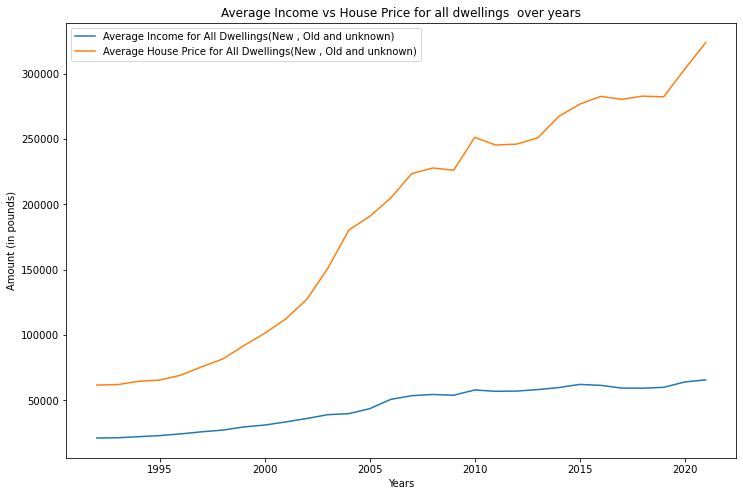

In [18]:
#plotting the average income and house prices for all dwellings
plt.figure(figsize=(12, 8)) 
plt.plot(df_group_year.average_income_all_dwellings, label='Average Income for All Dwellings(New , Old and unknown)')
plt.plot(df_group_year.average_price_all_dwellings, label ='Average House Price for All Dwellings(New , Old and unknown)')
plt.title('Average Income vs House Price for all dwellings  over years')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Amount (in pounds)')

From the above chart we can see that over the years , income has increased a lot while the house price is not much increased.

Text(0, 0.5, 'Average price(£)')

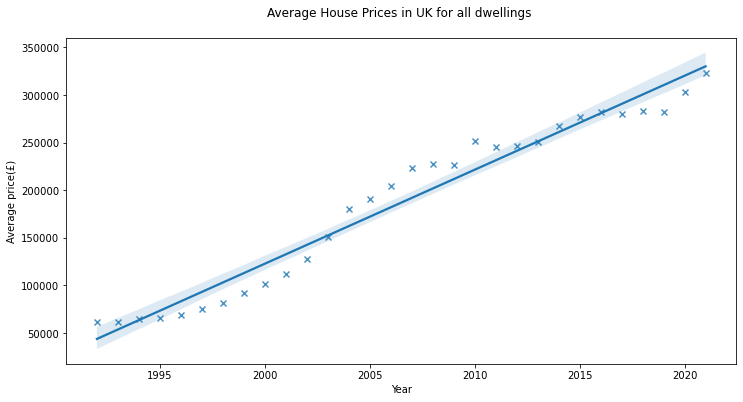

In [19]:
# Plotting average house price for all dwellings over the years
df_group_year.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.regplot(x='year', y='average_price_all_dwellings', data=df_group_year,marker='x')
plt.title('Average House Prices in UK for all dwellings \n')
plt.xlabel('Year')
plt.ylabel('Average price(£)')

In [20]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_group_year['year'],
                                                               df_group_year['average_price_all_dwellings'])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ 9872.06


Observations:

The regression line tells us that houses prices are increasing each year on average by nearly £9872 a year! <br/>



Text(0, 0.5, 'Average income(£)')

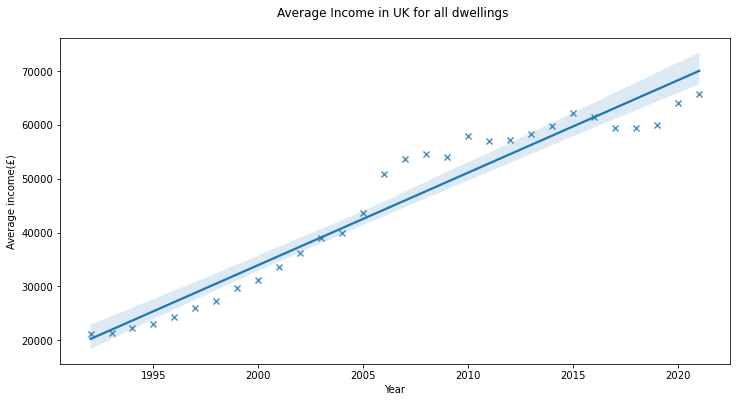

In [21]:
# Plotting average income for all dwellings over the years

plt.figure(figsize=(12,6))
sns.regplot(x='year', y='average_income_all_dwellings', data=df_group_year,marker='x')
plt.title('Average Income in UK for all dwellings \n')
plt.xlabel('Year')
plt.ylabel('Average income(£)')

In [22]:
# Slope of regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_group_year['year'],
                                                               df_group_year['average_income_all_dwellings'])

print('The slope of the regression line is: £','{:.2f}'.format(slope))

The slope of the regression line is: £ 1715.54


Observations:

The regression line tells us that income is increasing each year on average by nearly £1715 a year! <br/>



<AxesSubplot:>

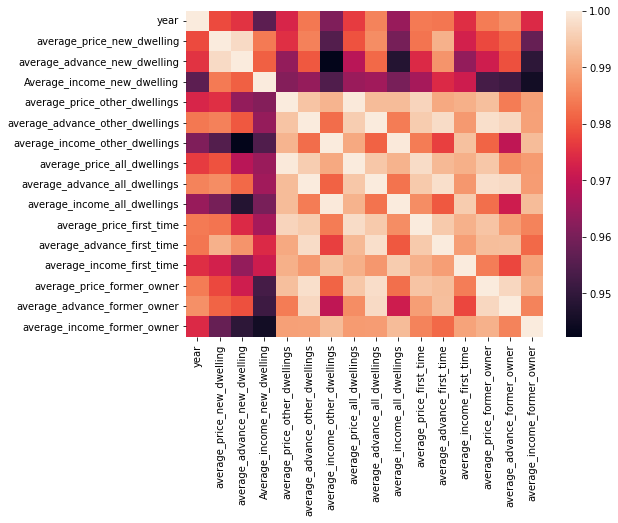

In [23]:
# checking the correlation between the columns 
plt.subplots(figsize=(8, 6))
sns.heatmap(df1.corr())

In [24]:
# checking the correlation
df1.corr()

,year,average_price_new_dwelling,average_advance_new_dwelling,Average_income_new_dwelling,average_price_other_dwellings,average_advance_other_dwellings,average_income_other_dwellings,average_price_all_dwellings,average_advance_all_dwellings,average_income_all_dwellings,average_price_first_time,average_advance_first_time,average_income_first_time,average_price_former_owner,average_advance_former_owner,average_income_former_owner
year,1.000000,0.978211,0.975330,0.956173,0.973362,0.983579,0.960810,0.976465,0.984940,0.964286,0.983872,0.983470,0.974754,0.984120,0.986818,0.973905
average_price_new_dwelling,0.978211,1.000000,0.997508,0.983804,0.974947,0.984847,0.954942,0.979181,0.986395,0.959879,0.983196,0.991283,0.972419,0.978043,0.981154,0.957639
average_advance_new_dwelling,0.975330,0.997508,1.000000,0.980826,0.963733,0.979743,0.942338,0.968680,0.981837,0.947827,0.973977,0.987360,0.963521,0.971696,0.979029,0.949218
Average_income_new_dwelling,0.956173,0.983804,0.980826,1.000000,0.961594,0.963957,0.954308,0.964550,0.965433,0.959939,0.966119,0.974082,0.971504,0.952886,0.951763,0.945100
average_price_other_dwellings,0.973362,0.974947,0.963733,0.961594,1.000000,0.993943,0.991877,0.999743,0.992814,0.992798,0.996479,0.990222,0.991044,0.993381,0.984161,0.988877
average_advance_other_dwellings,0.983579,0.984847,0.979743,0.963957,0.993943,1.000000,0.982253,0.995312,0.999867,0.984058,0.995239,0.997643,0.987923,0.998072,0.996881,0.989132
average_income_other_dwellings,0.960810,0.954942,0.942338,0.954308,0.991877,0.982253,1.000000,0.990188,0.981046,0.999749,0.984223,0.977016,0.993619,0.981295,0.969473,0.992970
average_price_all_dwellings,0.976465,0.979181,0.968680,0.964550,0.999743,0.995312,0.990188,1.000000,0.994461,0.991512,0.997632,0.992488,0.991189,0.994425,0.986394,0.988234
average_advance_all_dwellings,0.984940,0.986395,0.981837,0.965433,0.992814,0.999867,0.981046,0.994461,1.000000,0.983105,0.994976,0.998059,0.987801,0.997779,0.997330,0.988507
average_income_all_dwellings,0.964286,0.959879,0.947827,0.959939,0.992798,0.984058,0.999749,0.991512,0.983105,1.000000,0.986336,0.979948,0.995241,0.982572,0.971497,0.992933


In [25]:
#checking the correlation between income of all dwellings and average price all dwellings
df1.average_income_all_dwellings.corr(df1.average_price_all_dwellings)

0.991511556641327

### We can see from the above numbers that the correlation between income of all dwellings and average price all dwellings is highly correlated to each other.